In [132]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import VAR
from sklearn.metrics import r2_score


sns.set()

In [133]:
#load daily changes df
daily_changes = pd.read_csv('../data/processed/daily_changes.csv')
daily_changes = daily_changes.drop('Unnamed: 0', axis=1)
daily_changes.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,block_height,halving_period,months,years
3854,30792.0,9.0,15013126.0,20285.169157,0.048055,1.709948e+10,2.001681e+09,0.000000e+00,-0.000048,-1.406494,...,-25.373569,-38165.333594,-8.441732e+08,0.000014,-0.001518,-0.000042,169.0,0.0,0.0,0.0
3855,-110220.0,-10.0,-16400302.0,-20913.856500,0.090001,2.417704e+10,1.121651e+09,5.801295e+11,-0.000057,-1.716026,...,-2.779499,-186265.643460,-6.517472e+09,0.000050,-0.001126,-0.000509,159.0,0.0,0.0,0.0
3856,12262.0,-3.0,13150902.0,109042.692791,-0.043088,-6.269335e+09,1.159979e+09,3.073534e+10,-0.000051,-2.098584,...,-27.911835,-17407.250465,-8.276311e+08,-0.000163,-0.000504,0.000083,156.0,0.0,0.0,0.0
3857,90025.0,6.0,6049873.0,-14345.057455,0.516217,1.326183e+11,3.624139e+09,0.000000e+00,0.000112,7.277698,...,101.562473,364701.878087,1.982204e+10,0.001989,0.008500,0.004018,162.0,0.0,0.0,0.0
3858,-75316.0,-19.0,-40952241.0,-102852.108046,-0.038867,7.979432e+09,4.727677e+09,0.000000e+00,0.000136,6.513916,...,-2.963125,46535.973590,2.501305e+09,-0.000006,-0.000949,-0.000130,143.0,0.0,0.0,0.0


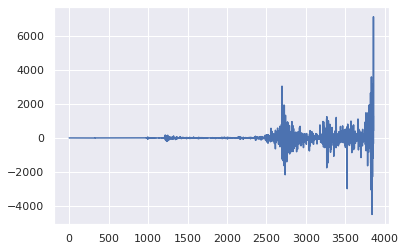

In [134]:
plt.plot(daily_changes['PriceUSD'])
plt.show()

In [135]:
! pip install --user tscv

In [136]:
#import package to perform train-test split
from tscv import GapLeavePOut, GapKFold, GapWalkForward, gap_train_test_split

In [137]:
#train-test split using varios methods from the tscv package

#Gap leave p out
p= round(len(daily_changes) * 0.2)
gap_before = round(p * 0.2)
gap_after = p - gap_before

cv_pout = GapLeavePOut(p=p, gap_before=gap_before, gap_after=gap_after)
pout_split = cv_pout.split(daily_changes)
pout_split




<generator object GapCrossValidator.split at 0x7fcbba6f9c10>

In [138]:
#Gap k fold
cv_gapkfold = GapKFold(n_splits=5, gap_before=gap_before, gap_after=gap_after)
gapkfold_split = cv_gapkfold.split(daily_changes)
gapkfold_split

<generator object GapCrossValidator.split at 0x7fcbba5e75f0>

In [139]:
#Gap kwalk forward
test_size= round(len(daily_changes) * 0.1)
gap_size = test_size * 0.1
print(test_size)

cv_gapwf = GapWalkForward(n_splits=5, gap_size=gap_size, test_size=test_size)
gapfw_split = cv_gapwf.split(daily_changes)
gapfw_split

386


<generator object GapWalkForward.split at 0x7fcbba034660>

In [140]:
#Gap train-test split

X = daily_changes.drop('PriceUSD', axis=1)
y = daily_changes['PriceUSD']

X_train, X_test, y_train, y_test = gap_train_test_split(X, y, test_size=test_size, gap_size=gap_size)

/home/julio/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [141]:
y_test

3473      94.608774
3474     -82.967086
3475    -281.515860
3476      57.006344
3477     -78.616389
           ...     
3854     916.210671
3855    1296.313473
3856    -338.714899
3857    7118.921891
3858     426.227919
Name: PriceUSD, Length: 386, dtype: float64

In [142]:
X_train

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,block_height,halving_period,months,years
0,69.0,2.0,2365.0,4.444066,-83.473202,-1.667395e+04,2.437326e+03,0.000000e+00,-0.003036,-0.000261,...,0.053296,25200.630000,1.938846e+03,0.000000,0.000000,0.000000,174.0,0.0,0.0,0.0
1,7.0,7.0,58171.0,290.435512,-17.458500,-2.028480e+04,1.278047e+03,0.000000e+00,-0.000150,-0.000012,...,-0.109338,-13132.710000,-1.251458e+03,0.000000,0.000000,0.000000,181.0,0.0,0.0,0.0
2,-152.0,26.0,-72434.0,-486.924600,-6.749070,1.626607e+04,1.434370e+03,1.023182e-12,0.000000,0.000000,...,1.362306,-4309.260000,-2.013698e+02,0.000000,0.000000,0.000000,207.0,0.0,0.0,0.0
3,-190.0,-31.0,-24241.0,-31.378074,-13.225212,-7.151690e+04,9.307358e+02,-1.023182e-12,0.000000,0.000000,...,-1.406014,11696.810000,1.227898e+02,0.000000,0.000000,0.000000,176.0,0.0,0.0,0.0
4,61.0,18.0,2251.0,-41.510192,-1.941361,7.986150e+03,1.023022e+03,0.000000e+00,0.000045,0.000003,...,0.243910,-17615.850000,-9.850738e+02,0.000000,0.000000,0.000000,194.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,-12405.0,14.0,-1909606.0,-15319.044298,-0.063571,-3.510278e+07,2.799027e+06,8.250859e+05,-0.000009,-0.002551,...,-0.793061,-97434.821111,-1.388116e+07,-0.000160,0.000485,0.000052,218.0,0.0,0.0,0.0
1154,981.0,-37.0,6497681.0,53646.510796,0.010142,9.083758e+06,1.099177e+06,2.487045e+07,0.000052,0.006804,...,-0.982145,-123385.015416,-1.508344e+07,-0.000656,-0.000022,-0.000064,181.0,0.0,0.0,0.0
1155,16323.0,-27.0,75762.0,25119.194375,0.014497,1.369287e+07,1.868488e+06,0.000000e+00,0.000269,0.034555,...,2.011272,266201.320754,3.399774e+07,-0.000132,-0.000020,-0.002106,154.0,0.0,0.0,0.0
1156,2915.0,25.0,4236276.0,539.860843,0.009061,8.677742e+06,1.208415e+06,0.000000e+00,0.003697,0.469745,...,-0.645345,-33360.181886,-3.802242e+06,-0.000352,-0.000103,-0.000027,179.0,0.0,0.0,0.0


In [143]:
X_test

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,block_height,halving_period,months,years
3473,14711.0,1.0,2354279.0,8874.309383,0.016258,1.735929e+09,4.697150e+07,0.000000e+00,9.037655e-06,0.084302,...,5.718044,-161021.888189,-1.344304e+09,6.001509e-07,-0.001020,-0.000644,153.0,0.0,0.0,0.0
3474,15477.0,3.0,8101098.0,32595.808195,-0.014953,-1.490974e+09,2.566441e+07,-3.906250e-03,-7.248193e-07,-0.011750,...,-6.060742,76960.732175,6.249262e+08,4.393915e-06,-0.000314,0.000042,156.0,0.0,0.0,0.0
3475,18037.0,3.0,6940078.0,24063.765119,-0.049966,-5.100167e+09,9.965609e+06,-3.906250e-03,-1.323462e-06,-0.029468,...,2.595118,128752.120484,9.176876e+08,-4.791418e-05,0.000750,-0.000565,159.0,0.0,0.0,0.0
3476,-69713.0,-7.0,-12542291.0,-33605.172170,0.009463,1.052257e+09,5.584443e+07,7.812500e-03,-1.374239e-05,-0.112108,...,0.738372,-183485.143600,-1.505929e+09,-3.005932e-06,-0.000077,-0.000183,152.0,0.0,0.0,0.0
3477,-54080.0,12.0,-15466763.0,-169561.118902,-0.014172,-1.412120e+09,2.674737e+07,-1.171875e-02,-1.012158e-05,-0.088415,...,-15.892159,-170779.850254,-1.465359e+09,6.431353e-06,0.000119,0.000044,164.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,30792.0,9.0,15013126.0,20285.169157,0.048055,1.709948e+10,2.001681e+09,0.000000e+00,-4.782791e-05,-1.406494,...,-25.373569,-38165.333594,-8.441732e+08,1.437850e-05,-0.001518,-0.000042,169.0,0.0,0.0,0.0
3855,-110220.0,-10.0,-16400302.0,-20913.856500,0.090001,2.417704e+10,1.121651e+09,5.801295e+11,-5.690043e-05,-1.716026,...,-2.779499,-186265.643460,-6.517472e+09,5.028310e-05,-0.001126,-0.000509,159.0,0.0,0.0,0.0
3856,12262.0,-3.0,13150902.0,109042.692791,-0.043088,-6.269335e+09,1.159979e+09,3.073534e+10,-5.079925e-05,-2.098584,...,-27.911835,-17407.250465,-8.276311e+08,-1.631481e-04,-0.000504,0.000083,156.0,0.0,0.0,0.0
3857,90025.0,6.0,6049873.0,-14345.057455,0.516217,1.326183e+11,3.624139e+09,0.000000e+00,1.121985e-04,7.277698,...,101.562473,364701.878087,1.982204e+10,1.989404e-03,0.008500,0.004018,162.0,0.0,0.0,0.0


In [144]:
y_train

0      -0.005040
1      -0.006064
2       0.004457
3      -0.020723
4       0.002123
          ...   
1153   -3.059268
1154    0.727940
1155    1.128248
1156    0.692584
1157    0.006569
Name: PriceUSD, Length: 1158, dtype: float64

In [145]:
#Creating DataFrames of train data.

#Choosing the variables from X_train
X_train = X_train[['AdrActCnt', 'TxCnt', 'IssTotNtv', 'HashRate', 'DiffMean']]
X_train.tail()

train_df = pd.concat([X_train, y_train], axis=1)
train_df.tail()

,AdrActCnt,TxCnt,IssTotNtv,HashRate,DiffMean,PriceUSD
1153,-12405.0,-2401.0,350.0,69.441815,8.250859e+05,-3.059268
1154,981.0,11799.0,-925.0,62.361569,2.487045e+07,0.727940
1155,16323.0,-779.0,-675.0,-151.167479,0.000000e+00,1.128248
1156,2915.0,14802.0,625.0,139.969888,0.000000e+00,0.692584
1157,4340.0,-9397.0,-350.0,-78.383137,0.000000e+00,0.006569


In [146]:
#VAR model
model = VAR(train_df)
results = model.fit(ic='aic')
model_max_lags = results.k_ar
print('model max lags: {}'.format(model_max_lags))
#print(results.mse(1))
print(results.summary())

model max lags: 22
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 12, Feb, 2021
Time:                     11:27:17
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    81.8878
Nobs:                     1136.00    HQIC:                   79.6867
Log likelihood:          -53376.7    FPE:                1.07177e+34
AIC:                      78.3507    Det(Omega_mle):     5.51573e+33
--------------------------------------------------------------------
Results for equation AdrActCnt
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const               133.988772       133.495601            1.004           0.316
L1.AdrActCnt         -0.577510         0.037197          -15.526           0.000
L1.TxCnt              0.166970       

In [147]:
#results.params['PriceUSD']

In [148]:
PriceUSD_pred = results.fittedvalues['PriceUSD']
PriceUSD_resid = results.resid['PriceUSD']

#print(y_train, PriceUSD_pred)

PriceUSD_r2 = r2_score(PriceUSD_pred, train_df['PriceUSD'].iloc[model_max_lags:])
PriceUSD_r2

-0.9038972775862453

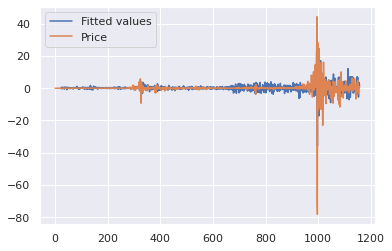

In [155]:
plt.plot(PriceUSD_fitted_values, label='Fitted values')
plt.plot(train_df['PriceUSD'], label='Price')
plt.legend(loc='best')
plt.show()



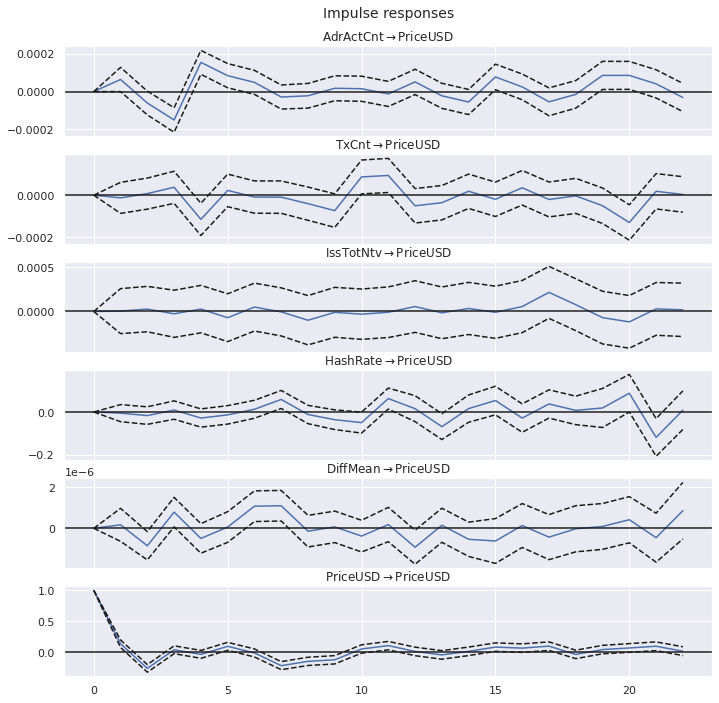

In [150]:
#impulse response plots
irf = results.irf(model_max_lags)
irf.plot(response='PriceUSD', orth=False)
plt.show()

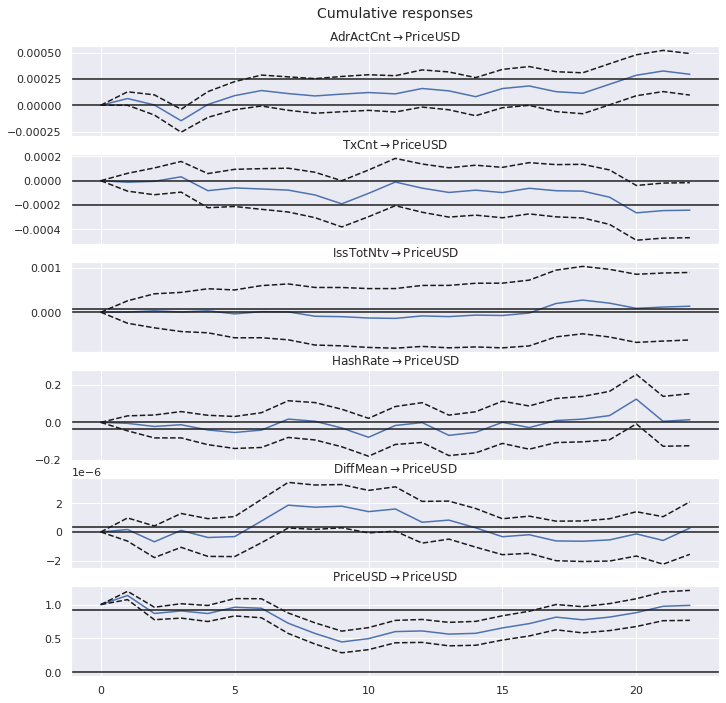

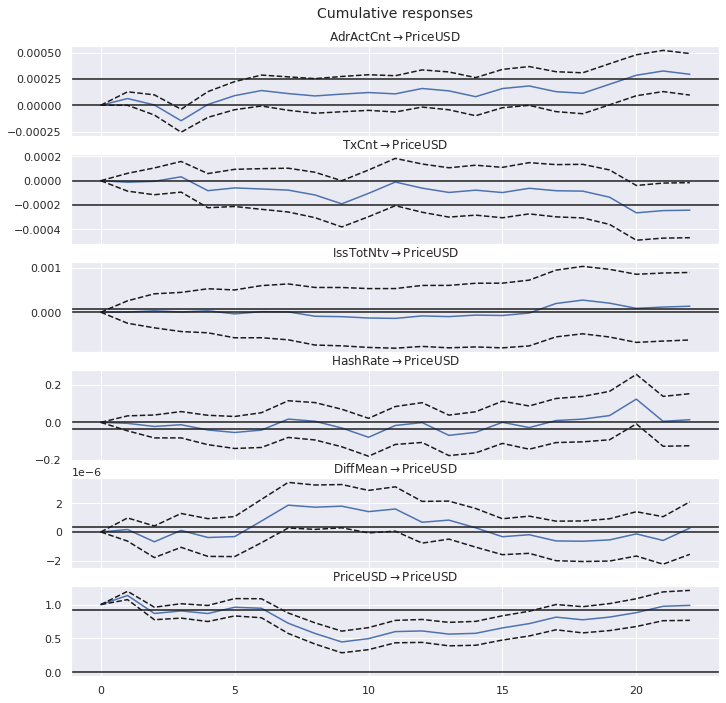

In [151]:
#cummulative impulse response plots
irf.plot_cum_effects(response='PriceUSD', orth=False)

In [152]:
var_model = VAR(train_df)
param_grid = {'ic': ['aic', 'fpe', 'hqic', 'bic'],
              'trend': ['c', 'ct', 'ctt', 'nc', 'n']}
var_model_cv = GridSearchCV(var_model, param_grid, cv=5)
var_model_cv.fit(X_train, y_train)

TypeError: Cannot clone object '<statsmodels.tsa.vector_ar.var_model.VAR object at 0x7fcbba623a90>' (type <class 'statsmodels.tsa.vector_ar.var_model.VAR'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.